# Importing Modules

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\autom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\autom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Data

In this dataset, we have top headlines for specific companies. Based on these headlines there are labels of values zero and one. Zero basically means that stock price will have a negative impact and One means that stock price will have a popositive impact.
Top1, Top2…. these are our news headlines.

In [ ]:
df = pd.read_csv('Data.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [ ]:
def plot_wordcloud(text):
    from wordcloud import WordCloud
    # Generating WordCloud
    comment_words = ''
    stopwords = nltk.corpus.stopwords.words("english")

    # iterate through the csv file
    for val in text:
        # typecaste each val to string
        val = str(val)
        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 700, background_color ='black',
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (12, 7), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

Total unique values are:  2 


Category	Value

1    2166
0    1935
Name: Label, dtype: int64


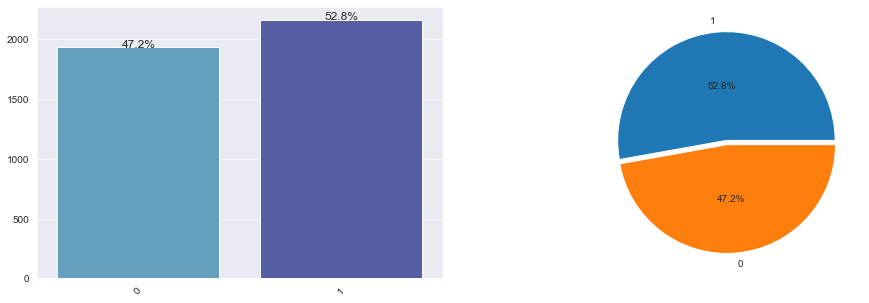

In [ ]:
make_plots(df.Label)

# Data Preparation

In [ ]:
df.Date = pd.to_datetime(df.Date)

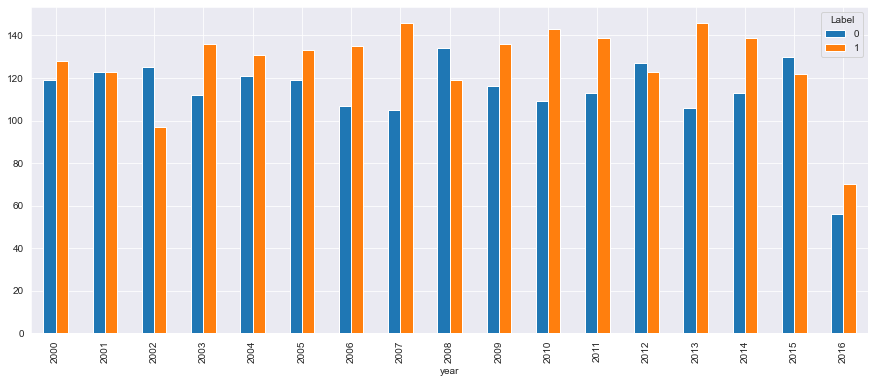

In [ ]:
df["year"] = df.Date.apply(lambda x: pd.to_datetime(x).year)
pd.crosstab(df.year, df.Label).plot(kind="bar", figsize=(15, 6))
plt.show()
df.drop("year", axis=1, inplace=True)

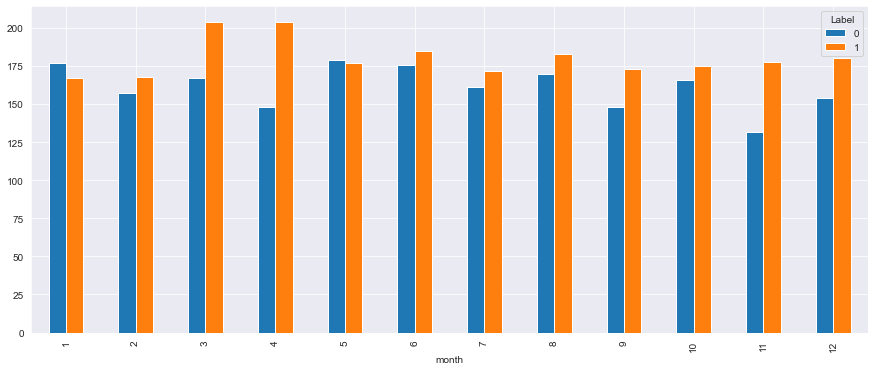

In [40]:
df["month"] = df.Date.apply(lambda x: pd.to_datetime(x).month)
pd.crosstab(df.month, df.Label).plot(kind="bar", figsize=(15, 6))
plt.show()
df.drop("month", axis=1, inplace=True)

In [ ]:
headlines = []
for row in range(0,len(df)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,2:]))

df["all_news"] = headlines

In [ ]:
STOPWORDS = nltk.corpus.stopwords.words("english") 
lemmatizer = nltk.stem.WordNetLemmatizer()

# Function to clean the data
def clean_data(txt):
    txt = txt.lower()                             # lowering text
    txt = re.sub(r'\n', ' ', txt)                 # Removing Newline
    txt = re.sub(r"[^a-zA-Z]"," ", txt)        # Removing all special characters
#     txt = " ".join([lemmatizer.lemmatize(i) for i in txt.split() if i not in STOPWORDS])   # Removing stopwrods and applying lemmatization
    return txt

In [ ]:
df.all_news = df.all_news.apply(clean_data)

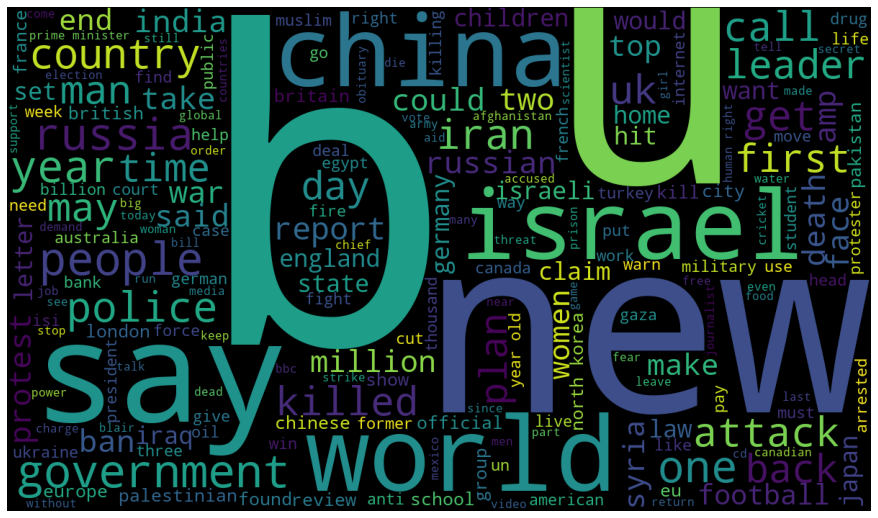

In [ ]:
plot_wordcloud(df[df.Label == 0].all_news)

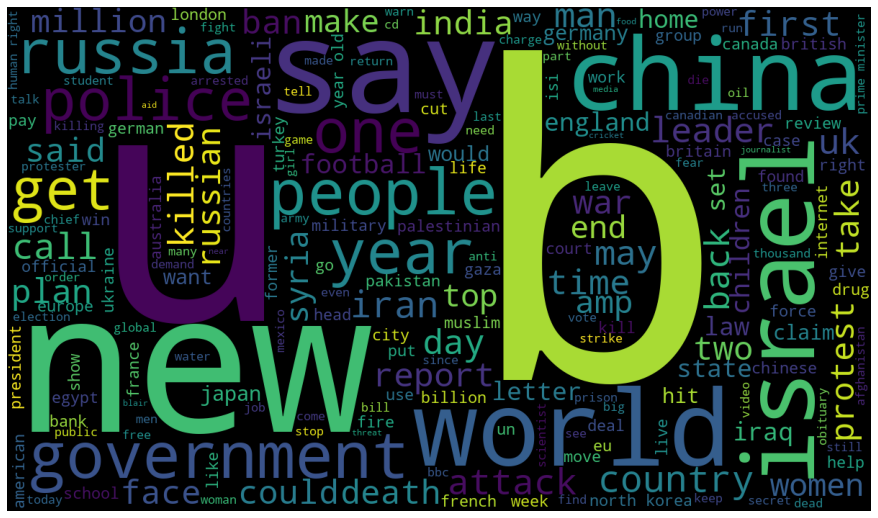

In [45]:
plot_wordcloud(df[df.Label == 0].all_news)

In [ ]:
df[["Date", "Label"]].to_csv("Sentiment_data.csv", index=False)

In [ ]:
X = df.all_news
y = df.Label

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
import pickle
file_name = "vectorizer.pkl"
pickle.dump(vectorizer, open(file_name, "wb"))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=100,criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
file_name = "model_sentiment.pkl"
pickle.dump(vectorizer, open(file_name, "wb"))